## PROBLEM STATEMENT
Unplanned downtime of wind turbines can result in a significant loss of revenue and energy and can easily scale to millions of dollars a year. It is therefore pivotal that flagging of the failure of components is made to prevent further loss and perform maintenance. It, however, involves replacement of components and higher costs. Condition-based monitoring systems rely on supervisory control and data acquisition systems to predict faults and get valuable insights into the turbine’s performance.

In this hackathon, ReNew Power shared minute-wise normalised data of wind speed, power and temperature data for multiple components of a wind turbine. The company is looking to create a model to get an ideally functioning turbine’s expected rotor bearing temperature. It will then use the model to check the deviation of the actual rotor bearing temperature of the faulty turbine from the expected temperature. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\ncu\Downloads\ReNew_Participants_Data\ReNew_Participants_Data\train.csv')
df=pd.DataFrame(data)

In [48]:
data1=pd.read_csv(r'C:\Users\ncu\Downloads\ReNew_Participants_Data\ReNew_Participants_Data\train.csv')
df=pd.DataFrame(data1)
data1.shape

(909604, 16)

In [3]:
df.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [4]:
# df.info(memory_usage='deep')
x=np.array([816.636759])
x.astype(np.float16)
print(x)

[816.636759]


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [6]:
dtypes={'timestamp':'object', 'active_power_calculated_by_converter':'float32', 'active_power_raw':'float32',
       'ambient_temperature':'float32', 'generator_speed':'float32', 'generator_winding_temp_max':'float32',
       'grid_power10min_average':'float32', 'nc1_inside_temp':'float32', 'nacelle_temp':'float32',
       'reactice_power_calculated_by_converter':'float32', 'reactive_power':'float32',
       'wind_direction_raw':'float32', 'wind_speed_raw':'float32', 'wind_speed_turbulence':'float32',
       'turbine_id':'category', 'Target':'float32'}

data=pd.read_csv(r'C:\Users\ncu\Downloads\ReNew_Participants_Data\ReNew_Participants_Data\train.csv',dtype=dtypes)

In [7]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   timestamp                               909604 non-null  object  
 1   active_power_calculated_by_converter    909604 non-null  float32 
 2   active_power_raw                        909604 non-null  float32 
 3   ambient_temperature                     909604 non-null  float32 
 4   generator_speed                         909604 non-null  float32 
 5   generator_winding_temp_max              909604 non-null  float32 
 6   grid_power10min_average                 909604 non-null  float32 
 7   nc1_inside_temp                         909604 non-null  float32 
 8   nacelle_temp                            909604 non-null  float32 
 9   reactice_power_calculated_by_converter  909604 non-null  float32 
 10  reactive_power                  

In [8]:
data.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636780,834.917236,31.694380,1159.616577,65.954216,917.897095,31.881971,31.504713,141.457642,165.501526,280.864777,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107819,421.050873,12.894948,928.747986,59.571320,445.554260,32.423706,32.755772,89.186455,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530518,1337.566162,16.648388,1201.219727,61.270496,1364.716064,11.446849,18.332985,230.622314,281.452240,84.960106,8.092458,0.622318,Turbine_105,39.989235
3,2021-10-30 03:47:00,61.494873,53.481007,28.388142,769.806152,40.674347,14.324897,34.253204,32.662888,66.211014,75.017532,87.261116,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514343,611.659119,31.519527,1046.916748,64.341759,599.020203,32.405586,31.466387,137.163940,160.202423,313.724823,6.357943,0.346068,Turbine_01,54.346096


In [9]:
# dtypes = {
#     "Transaction unique identifier": "category",
#     "Price": "float64",
#     "Property Type": "category",
#     "Old/New": "category",
#     "Duration": "category",
#     "Town/City": "category",
#     "District": "category",
#     "Country": "category",
#     "County": "category",
#     "PPDCategory Type": "category",
#     "Record Status - monthly file only": "category"
# }

In [10]:
df.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

# here

In [11]:
data.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636780,834.917236,31.694380,1159.616577,65.954216,917.897095,31.881971,31.504713,141.457642,165.501526,280.864777,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107819,421.050873,12.894948,928.747986,59.571320,445.554260,32.423706,32.755772,89.186455,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530518,1337.566162,16.648388,1201.219727,61.270496,1364.716064,11.446849,18.332985,230.622314,281.452240,84.960106,8.092458,0.622318,Turbine_105,39.989235
3,2021-10-30 03:47:00,61.494873,53.481007,28.388142,769.806152,40.674347,14.324897,34.253204,32.662888,66.211014,75.017532,87.261116,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514343,611.659119,31.519527,1046.916748,64.341759,599.020203,32.405586,31.466387,137.163940,160.202423,313.724823,6.357943,0.346068,Turbine_01,54.346096


In [12]:
data.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

In [13]:
data.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.885925,537.639465,25.573919,931.131042,60.730122,527.579529,31.755823,31.686417,111.080627,133.692352,199.487183,5.894949,0.651916,46.328587
std,474.619568,482.394897,8.025649,193.674377,9.721582,472.656982,3.929794,3.554426,78.219940,91.232155,104.617264,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393707,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620899,155.813244,17.093679,770.538574,54.916768,147.181549,29.913803,30.267423,81.540848,96.045763,98.916059,4.400753,0.432129,44.816740
50%,379.989929,383.985916,27.919035,884.068481,60.034489,391.303192,31.762946,31.961611,92.005825,107.633377,232.821159,5.637207,0.583863,46.302898
75%,781.357468,800.261108,32.171696,1123.335815,65.737188,794.875687,33.469747,33.546259,124.879156,154.153736,287.667511,7.092772,0.798240,47.733105
max,1999.999878,1999.984497,48.089016,1267.140625,129.846405,1999.991455,52.790031,48.406105,523.892700,592.815918,359.455536,19.795000,9.534769,65.037689


In [14]:
print(data.columns)
len(data.columns)

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')


16

In [15]:
features=['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence']
df_f=data[features]
for i, feature in enumerate(features):
    print(i ,' ---> ',feature)

0  --->  active_power_calculated_by_converter
1  --->  active_power_raw
2  --->  ambient_temperature
3  --->  generator_speed
4  --->  generator_winding_temp_max
5  --->  grid_power10min_average
6  --->  nc1_inside_temp
7  --->  nacelle_temp
8  --->  reactice_power_calculated_by_converter
9  --->  reactive_power
10  --->  wind_direction_raw
11  --->  wind_speed_raw
12  --->  wind_speed_turbulence


In [16]:
# fig, ax = plt.subplots(5,3,figsize=(20,15))

# for i in [0,1,2,3,4]:
#     for j in [0,1,2]:
#         if ft<13:
#             sns.distplot(data[ft],ax=ax[i][j])
#             ft=ft+1

# PLOT

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

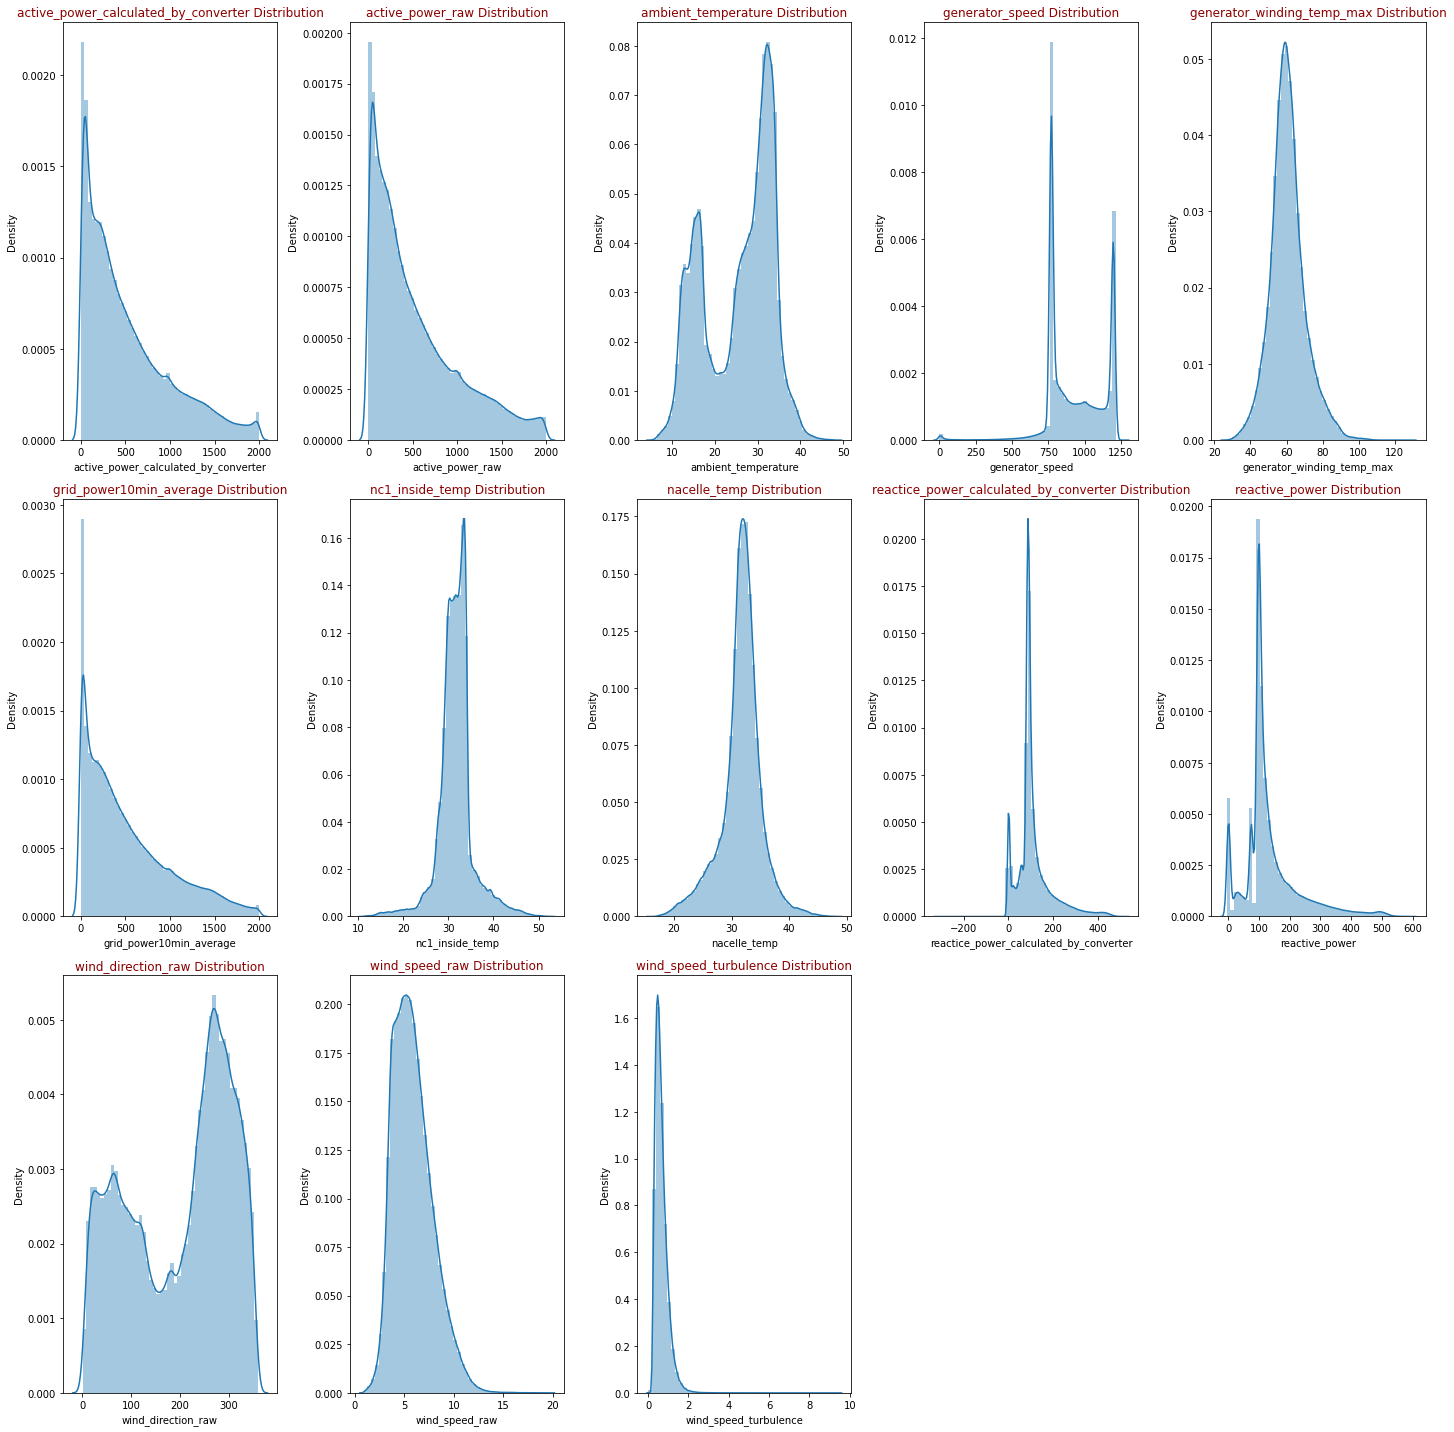

In [57]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.distplot(data[feature],ax=ax)
        ax.set_title(feature+" Distribution",color='DarkRed')
#         dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
#         ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
                     
draw_histograms(data,features,3,5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='generator_winding_temp_max'>

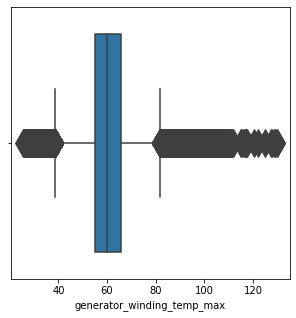

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(data['generator_winding_temp_max'],fliersize=20)

In [17]:
data['generator_winding_temp_max'].skew()

0.48279142

In [18]:
upper_limit=data['generator_winding_temp_max'].mean()+3*data['generator_winding_temp_max'].std()
lower_limit=data['generator_winding_temp_max'].mean()-3*data['generator_winding_temp_max'].std()

data['generator_winding_temp_max']=np.where(data['generator_winding_temp_max']>upper_limit,upper_limit,
                                            np.where(data['generator_winding_temp_max']<lower_limit,lower_limit,
                                            data['generator_winding_temp_max']))

In [27]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

<AxesSubplot:>

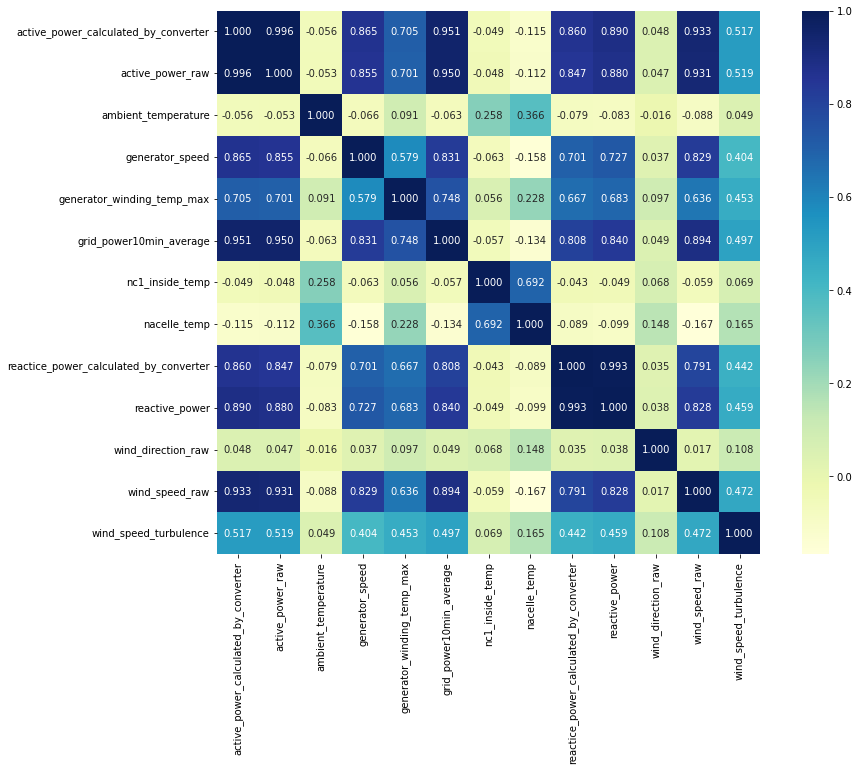

In [19]:
corr= df_f.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt="0.3f",cmap='YlGnBu',cbar=True,square=True,xticklabels='auto',
    yticklabels='auto')

In [20]:
def correlation(corr,features,threshold):
    col_corr=set()  # set of all the names of correlated columns
    for i in range(len(features)):
        for j in range(i):
            if abs(corr.iloc[i][j]) > threshold:
                col_corr.add(corr.columns[i])
    return col_corr

correlation(corr,features,0.95)

{'active_power_raw', 'grid_power10min_average', 'reactive_power'}

In [21]:
print(len(data.columns))
data.columns
data.drop(columns=['active_power_raw', 'grid_power10min_average', 'reactive_power'],axis=0,inplace=True)
data.shape

16


(909604, 13)

In [22]:
data.columns

Index(['timestamp', 'active_power_calculated_by_converter',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'wind_direction_raw',
       'wind_speed_raw', 'wind_speed_turbulence', 'turbine_id', 'Target'],
      dtype='object')

In [23]:
train_y=data['Target']
data.drop(columns=['Target'],inplace=True)

In [24]:
data.shape
type(train_y)

pandas.core.series.Series

In [25]:
data.tail()

,timestamp,active_power_calculated_by_converter,ambient_temperature,generator_speed,generator_winding_temp_max,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
909599,2021-04-25 19:12:00,929.101929,32.736076,1187.303223,83.187141,32.291393,35.152279,152.216446,189.901810,7.155343,1.028960,Turbine_13
909600,2021-02-20 17:37:00,100.730530,30.540501,770.245605,56.235497,30.434301,29.932140,85.353111,93.417587,4.121607,0.595874,Turbine_158
909601,2021-10-22 14:18:00,1120.916016,30.901129,1170.456909,62.942944,30.491817,33.085163,42.820210,230.988403,8.551669,0.951241,Turbine_15
909602,2021-02-08 22:03:00,123.444565,32.697933,770.190796,57.245209,32.338825,31.525385,86.549095,65.408798,4.324064,0.247335,Turbine_97
909603,2021-04-09 14:28:00,4.843147,19.452520,736.601685,60.603886,30.798931,38.252201,2.763231,11.127739,2.017444,0.963029,Turbine_105


In [26]:
test=pd.read_csv(r'C:\Users\ncu\Downloads\ReNew_Participants_Data\ReNew_Participants_Data\test.csv',dtype=dtypes)
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233265,410.538818,57.357365,84.008400,48.826595,45.363476,2.419202,1.468876,156.399399,2.438629,0.790435,Turbine_14
1,472.577240,478.373871,12.306687,965.077576,51.796726,492.531372,27.457512,24.045565,96.152069,119.378235,56.443802,5.900372,0.544198,Turbine_19
2,447.829620,451.158264,29.106771,948.035889,60.493099,393.151581,39.410553,35.715698,90.251526,117.192635,224.540268,5.924923,0.513481,Turbine_14
3,254.014328,249.438965,27.074900,804.963745,55.741898,178.715103,29.476841,31.151896,89.273834,105.086258,182.151428,4.409707,0.448881,Turbine_120
4,1174.930542,1202.654053,32.148434,1199.754883,67.272316,1115.850342,31.920549,30.864277,189.731995,236.053314,261.672180,7.822326,0.561465,Turbine_158


In [47]:
test1=pd.read_csv(r'C:\Users\ncu\Downloads\ReNew_Participants_Data\ReNew_Participants_Data\test.csv',dtype=dtypes)
test1.head()
test1.shape

(303202, 14)

In [49]:
print(test1.columns)
print('*'*50)
print(data1.columns)

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id'],
      dtype='object')
**************************************************
Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')


In [27]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303202 entries, 0 to 303201
Data columns (total 14 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   active_power_calculated_by_converter    303202 non-null  float32 
 1   active_power_raw                        303202 non-null  float32 
 2   ambient_temperature                     303202 non-null  float32 
 3   generator_speed                         303202 non-null  float32 
 4   generator_winding_temp_max              303202 non-null  float32 
 5   grid_power10min_average                 303202 non-null  float32 
 6   nc1_inside_temp                         303202 non-null  float32 
 7   nacelle_temp                            303202 non-null  float32 
 8   reactice_power_calculated_by_converter  303202 non-null  float32 
 9   reactive_power                          303202 non-null  float32 
 10  wind_direction_raw              

In [28]:
test=test[[ 'active_power_calculated_by_converter',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'wind_direction_raw',
       'wind_speed_raw', 'wind_speed_turbulence', 'turbine_id']]

In [35]:
#test.columns
data.columns

Index(['timestamp', 'active_power_calculated_by_converter',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'wind_direction_raw',
       'wind_speed_raw', 'wind_speed_turbulence', 'turbine_id'],
      dtype='object')

In [45]:
test.columns

Index(['active_power_calculated_by_converter', 'ambient_temperature',
       'generator_speed', 'generator_winding_temp_max', 'nc1_inside_temp',
       'nacelle_temp', 'reactice_power_calculated_by_converter',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence'],
      dtype='object')

In [36]:
data.drop(columns=['timestamp','turbine_id'],inplace=True)
test.drop(columns=['turbine_id'],inplace=True)

In [37]:
test_df=pd.DataFrame(test)
train_df=pd.DataFrame(data)

In [38]:
print(data.columns)
print(data.shape)

Index(['active_power_calculated_by_converter', 'ambient_temperature',
       'generator_speed', 'generator_winding_temp_max', 'nc1_inside_temp',
       'nacelle_temp', 'reactice_power_calculated_by_converter',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence'],
      dtype='object')
(909604, 10)


In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
import xgboost as xgb
dmatrix = xgb.DMatrix(data=data, label=train_y)
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 41.52


In [68]:
pred.to_csv(r'C:\Users\ncu\Documents\Unreal Projects\MyProject\my_submission_file.csv', index=False)

In [69]:
pred.shape

(303202, 1)

In [62]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'max_depth': [6, 7,9],
           'learning_rate': [0.1,0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100,300,500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=5,
                         verbose=1)
clf.fit(data,train_y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7}
Lowest RMSE:  1.508537205288819


In [64]:
pred_train1=clf.predict(data)
pred_train1=pd.DataFrame(pred_train1)
print('r2 score -->',r2_score(train_y,pred_train1))
print('mae -->',mean_absolute_error(train_y,pred_train1))

r2 score --> 0.7067916793788285
mae --> 0.9758748


In [65]:
submission_df=clf.predict(test)

In [67]:
submission_df=pd.DataFrame(submission_df)

In [69]:
submission_df.head()
submission_df.shape

(303202, 1)

In [70]:
submission_df.to_csv('my_submission_file.csv', index=False)

In [ ]:
result=clf.predict(test)

In [ ]:
import sklearn.metrics
sklearn.metrics.SCORERS.keys()